In [30]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt

In [31]:
class Interval:
    
    def __init__(self, lb, ub=None, vis=False):
        """
        Initialize method for interval class, sets left bound and and right bound of interval.
        :param lb: Lower bound of interval
        :(optional) param ub: Upper bound of interval (if no upperbound, then it is the same as the lower bound).
        :(optional) param vis: If true -> Prints out the interval after initialization, else no print out.
        """
        self.vis = vis
        
        self.lb = lb
        if ub:
            self.ub = ub
        else:
            self.ub = self.lb
        
        if self.vis:
            self.print()
    
    def __add__(self, other):
        """
        Adds an interval, float or int to the current interval and returns the new interval.
        
        How add works: 
        Add intervals -> [a, b] + [c, d] = [a+c, b+d]
        Add with float/int -> [a, b] + i = [a+i, b+i]
        
        :param other: Interval, float or int to be added to the interval.
        """
        if isinstance(other, Interval):
            lb = self.lb + other.lb
            ub = self.ub + other.ub
        else:
            lb = self.lb + other
            ub = self.ub + other

        return Interval(lb, ub, vis=self.vis)
    
    def __radd__(self, other):
        """
        Reverse addition for addition between an interval and a float/int.
        
        How reverse add works: 
        i + [a, b] --(radd)--> [a, b] + i = [a+i, b+i]
        
        :param other: Interval, float or int to be added to the interval.
        """
        lb = self.lb + other
        ub = self.ub + other

        return Interval(lb, ub, vis=self.vis)
        
    
    def __sub__(self, other):
        """
        Subtracts an interval, float or int from the current interval and returns the new interval.
        
        How sub works: 
        Sub intervals -> [a, b] - [c, d] = [a-d, b-c]
        Sub with float/int -> [a, b] - i = [a-i, b-i]
        
        :param other: Interval, float or int to be subtracted from the interval.
        """
        if isinstance(other, Interval):
            lb = self.lb - other.ub
            ub = self.ub - other.lb
        else:
            lb = self.lb - other
            ub = self.ub - other

        return Interval(lb, ub, vis=self.vis)
    
    def __rsub__(self, other):
        """
        Reverse subtraction for subtraction between an interval and a float/int.
        
        How reverse add works: 
        i - [a, b] --(rsub)--> [i-b, i-a]
        
        :param other: Interval, float or int to be added to the interval.
        """
        lb = other - self.ub
        ub = other - self.lb
        return Interval(lb, ub, vis=self.vis)
    
    def __mul__(self, other):
        """
        Multiplies an interval, float or int to the current interval and returns the new interval.
        
        How mul works: 
        Mul intervals -> [a, b] * [c, d] = [min(ac, ad, bc, bd), max(ac, ad, bc, bd)]
        Mul with float/int -> [a, b] * i = [min(a*i, b*i), max(a*i, b*i)]
        
        :param other: Interval, float or int to be multiplied to the interval.
        """
        if isinstance(other, Interval):
            lb = min(self.lb*other.lb, self.lb*other.ub, self.ub*other.lb, self.ub*other.ub)
            ub = max(self.lb*other.lb, self.lb*other.ub, self.ub*other.lb, self.ub*other.ub)
        else:
            lb = min(self.lb * other, self.ub * other) 
            ub = max(self.lb * other, self.ub * other)

        return Interval(lb, ub, vis=self.vis)
    
    def __rmul__(self, other):
        """
        Reverse multiplication for multiplying between an interval and a float/int.
        
        How reverse add works: 
        i * [a, b] --(rmul)--> [min(a*i, b*i), max(a*i, b*i)]
        
        :param other: Interval, float or int to be added to the interval.
        """
        lb = min(self.lb * other, self.ub * other) 
        ub = max(self.lb * other, self.ub * other)
        return Interval(lb, ub, vis=self.vis)
             
    def __truediv__(self, other):
        """
        Divides an interval by an interval and returns the new interval.
        
        How truediv works: 
        Truediv intervals -> [a, b] / [c, d] = [min(a/c, a/d, b/c, b/d), max(a/c, a/d, b/c, b/d)]
        if c or d is zero then error is raised.
        
        :param other: Interval divisor to the current interval.
        """
        if 0 in other: 
            raise ZeroDivisionError
        else:
            lb = min(self.lb/other.lb, self.lb/other.ub, self.ub/other.lb, self.ub/other.ub)
            ub = max(self.lb/other.lb, self.lb/other.ub, self.ub/other.lb, self.ub/other.ub)
            return Interval(lb, ub, vis=self.vis)
            
          
    def __pow__(self, n):
        """
        Raises an interval to some integer power and returns the new interval.
        
        How pow works:
        DISCLAIMER must be integer values.
        
        For odd n >= 1 -> [a, b]^n = [a^n, b^n]
        
        For even n > 0 -> [a, b]^n = [a^n, b^n] for a >= 0
                                     [b^n, a^n] for b < 0
                                     [0, max(a^n, b^n)] else.
        
        :param n: Exponent for exponantiation.
        """
        if not isinstance(n, int):
            print('Only handles integer values')
            return None

        if n < 1:
            print('Cannot handle values smaller than 1')
            return None
        
        # Is even
        if n % 2 == 0:
            # Three cases
            if self.lb >= 0:
                lb, ub = self.lb ** n, self.ub ** n
            elif self.ub < 0:
                lb, ub = self.ub ** n, self.lb ** n
            else:
                lb, ub = 0, max(self.lb ** n, self.ub ** n)
        
        # Is odd
        else:
            lb, ub = self.lb ** n, self.ub ** n

        return Interval(lb, ub, vis=self.vis) 
            
    def __contains__(self, x):
        """
        Checks if value x is in the interval.
        :param x: Value to be checked if in interval.
        """
        return self.lb <= x <= self.ub    
        
    def __repr__(self):
        """
        String representation of an interval.
        """
        return f'[{self.lb}, {self.ub}]'
    
    def print(self):
        """
        Prints out the interval.
        """
        print(repr(self))

In [32]:
# Test operations between intervals.
I1 = Interval(1, 4, vis=True)    # [1, 4]
I2 = Interval(-2, -1, vis=True)  # [-2, -1]
I1+I2                            # [-1, 3]
I1-I2                            # [2, 6]
I1*I2                            # [-8, -1]
I1/I2                            # [-4.,-0.5]

[1, 4]
[-2, -1]
[-1, 3]
[2, 6]
[-8, -1]
[-4.0, -0.5]


[-4.0, -0.5]

In [33]:
# Test operations between interval and int/float.
I = Interval(2,3, vis=True) # [2, 3]
I + 1 # [3, 4]
1 + I # [3, 4] 
1.0 + I # [3.0, 4.0] 
I + 1.0 # [3.0, 4.0] 
1 - I # [-2, -1] 
I -1 # [1, 2] 
1.0 - I # [-2.0, -1.0]
I - 1.0 # [1.0, 2.0] 
I * 1 # [2, 3] 
1 * I # [2, 3] 
1.0 * I # [2.0, 3.0] 
I * 1.0 # [2.0, 3.0]

[2, 3]
[3, 4]
[3, 4]
[3.0, 4.0]
[3.0, 4.0]
[-2, -1]
[1, 2]
[-2.0, -1.0]
[1.0, 2.0]
[2, 3]
[2, 3]
[2.0, 3.0]
[2.0, 3.0]


[2.0, 3.0]

In [34]:
# Test interval power.
x = Interval(-2,2, vis=True) # [-2, 2] 
x ** 2 # [0, 4]
x ** 3 # [-8, 8] 

[-2, 2]
[0, 4]
[-8, 8]


[-8, 8]

In [35]:
# Construct list of intervals.
xl, xu = np.linspace(0., 1, 1000), np.linspace(0., 1, 1000) + 0.5
intervals = [Interval(xli, xui) for xli, xui in zip(xl, xu)]

p = lambda I: 3*(I**3) - 2 * (I**2) - 5*I - 1

# Evaluate interval function p over all prescribed intervals.
yl, yu = [], []
for interval in intervals:
    _p = p(interval)
    yl.append(_p.lb)
    yu.append(_p.ub)
    

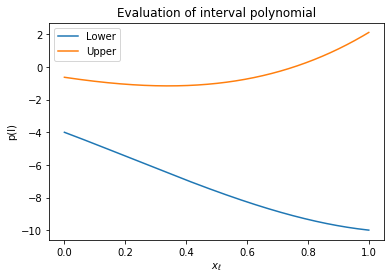

In [36]:
# Plot bounds of intervals
plt.plot(xl, yl)
plt.plot(xl, yu)
plt.legend(['Lower', 'Upper'])
plt.title('Evaluation of interval polynomial')
plt.ylabel('p(I)')
plt.xlabel('$x_\ell$')
plt.show()